In [1]:
# Dependencies
import os
import csv
import json
import time
import requests
import pandas as pd
import numpy as np
import scipy.stats as sts
from pprint import pprint
from config import api_key
from citipy import citipy
import matplotlib.pyplot as plt

output_dir = os.path.join("Figures","")

In [2]:
## Create latitudes and cities lists variables and initialize them as empty lists
cities = []
# Generate a list of cities using a random function up to 1500 in size for scanning
# Note: larger number of cities can be obtained with larger size, however for this task only about 500 are required
latitude = np.random.uniform(low=-90.000, high=90.000, size=2000)
longitude = np.random.uniform(low=-180.000, high=180.000, size=2000)

latitudes_longitudes = zip(latitude, longitude)
count_cities_500 = 0
for latitude_longitude in latitudes_longitudes:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    # If city is not in cities, then append the city to the cities' list. Limit the city list to 500
    if city not in cities:
        if count_cities_500 < 500:
            cities.append(city)
            count_cities_500 += 1
        else:
            break
    else:
        continue
print(f"First five are listed here: {cities[:5]}...")
print(f"There are {len(cities)} cities in the list.")

First five are listed here: ['hobart', 'constitucion', 'saskylakh', 'ancud', 'kununurra']...
There are 500 cities in the list.


In [3]:
# url for weather api
units = 'english'
url   = "http://api.openweathermap.org/data/2.5/weather?q="
url2  = "http://api.openweathermap.org/data/2.5/group?id=524901,703448,2643743&units=metric"
city_5_list    = cities[:5]
city_list      = []
temp_list      = []
lat_list       = []
long_list      = []
humid_list     = []
cloud_list     = []
wind_list      = []
city_id_list   = []
counter        = 0
city_id        = 0

for city in cities:
    try:
        if counter < 49:
            query_test_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
            #print(query_test_url)
            response = requests.get(query_test_url).json()
            #print(response)
            city_list.append(response["name"])
            city_id = response["id"]
            city_id_list.append(response["id"])
            print(f"! City {city.capitalize()} with ID ({city_id}) is found.")
            temp_list.append(response["main"]["temp"])
            lat_list.append(response["coord"]["lat"])
            long_list.append(response["coord"]["lon"])
            humid_list.append(response["main"]["humidity"])
            cloud_list.append(response["clouds"]["all"])
            wind_list.append(response["wind"]["speed"])
            
            counter = counter + 1
        else:
            counter = 0
            time.sleep(2) # sleep for 2 seconds before restarting calling weather API
            print(f"********** Reset counter and wait for 2 seconds **********")
            continue
    except KeyError:
        print(f"City '{city.capitalize()}' was not found.")
print("=======================")
print("Fetching data completed")
print(f"Total number of cities is limited to {len(cities)}")
print("=======================")

! City Hobart with ID (2163355) is found.
! City Constitucion with ID (3893726) is found.
! City Saskylakh with ID (2017155) is found.
! City Ancud with ID (3899695) is found.
! City Kununurra with ID (2068110) is found.
City 'Taolanaro' was not found.
! City Kuah with ID (1222396) is found.
! City Srednekolymsk with ID (2121025) is found.
! City Cape town with ID (3369157) is found.
! City San carlos de bariloche with ID (7647007) is found.
! City Rikitea with ID (4030556) is found.
! City Punta arenas with ID (3874787) is found.
! City Kaitangata with ID (2208248) is found.
! City Privolzhsk with ID (505060) is found.
! City Busselton with ID (2075265) is found.
! City Port hawkesbury with ID (6111867) is found.
! City Tautira with ID (4033557) is found.
! City Rabo de peixe with ID (3372745) is found.
! City Banepa with ID (1283679) is found.
! City Chuka with ID (199284) is found.
! City Vaini with ID (4032243) is found.
! City Ushuaia with ID (3833367) is found.
! City Nueva flori

! City Saint george with ID (5546220) is found.
! City Preobrazheniye with ID (2017658) is found.
! City Teguldet with ID (1489822) is found.
! City Pilar with ID (3392126) is found.
! City Leningradskiy with ID (2123814) is found.
! City Sao filipe with ID (3374210) is found.
! City Quelimane with ID (1028434) is found.
! City Kendari with ID (1640344) is found.
! City Darnah with ID (87205) is found.
! City Lastoursville with ID (2399870) is found.
! City Grindavik with ID (3416888) is found.
! City Rodney with ID (6127029) is found.
! City Quilali with ID (3617109) is found.
! City Vestmannaeyjar with ID (3412093) is found.
! City Ngunguru with ID (2186111) is found.
! City Bonfim with ID (3405215) is found.
! City Dalbandin with ID (1180729) is found.
! City Taraz with ID (1516905) is found.
! City Vila velha with ID (3445026) is found.
! City Poyarkovo with ID (2017705) is found.
City 'Kuche' was not found.
! City Port hardy with ID (6111862) is found.
! City Bay-khaak with ID (15

********** Reset counter and wait for 2 seconds **********
! City Tarko-sale with ID (1490085) is found.
! City Piacabucu with ID (3454005) is found.
! City Umm bab with ID (289548) is found.
! City Kerema with ID (2094144) is found.
! City Sao joao da barra with ID (3448903) is found.
! City Valdivia with ID (3868707) is found.
! City Tiznit with ID (2527087) is found.
! City General roca with ID (3855065) is found.
! City Dunmore east with ID (2964492) is found.
! City Elliot lake with ID (5947866) is found.
! City Ust-kut with ID (2013923) is found.
! City Arak with ID (143127) is found.
! City Terebovlya with ID (691693) is found.
! City Williamsport with ID (5219585) is found.
! City Sioni with ID (615844) is found.
! City Kibaya with ID (158006) is found.
! City Narsaq with ID (3421719) is found.
! City Northam with ID (2641434) is found.
! City Junagarh with ID (1268772) is found.
! City Lorengau with ID (2092164) is found.
City 'Karamea' was not found.
! City Zhanakorgan with I

In [16]:
print(f"There are {len(cities)} cities in the 'cities' list.")

There are 500 cities in the 'cities' list.


In [17]:
# Create a dataframe from the collected data
weather_df = pd.DataFrame({'City': city_list,
                           'Temperature (DegF)': temp_list,
                           'Cloudiness (%)': cloud_list,
                           'Latitude': lat_list,
                           'Longitude': long_list,
                           'Humidity (%)': humid_list,
                           'Wind Speed (mps)': wind_list})
weather_df.head()

,City,Temperature (DegF),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
0,Hobart,284.06,75,-42.88,147.33,66,6.70
1,Constitución,286.76,100,-35.33,-72.42,60,3.21
2,Saskylakh,279.63,100,71.92,114.08,62,1.86
3,Ancud,281.57,90,-41.87,-73.82,100,4.60
4,Kununurra,290.15,0,-15.77,128.73,36,1.00


In [18]:
# Extract data for the northern hemisphere
northern_weather_df = weather_df.loc[weather_df['Latitude'] >= 0]
northern_weather_df.head()

,City,Temperature (DegF),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
2,Saskylakh,279.63,100,71.92,114.08,62,1.86
5,Kuah,301.04,20,6.33,99.84,88,1.50
6,Srednekolymsk,291.58,0,67.45,153.68,50,1.48
12,Privolzhsk,283.51,0,57.38,41.29,72,2.94
14,Port Hawkesbury,290.63,90,45.62,-61.35,93,1.50


In [21]:
# Extract data for the southern hemisphere
southern_weather_df = weather_df.loc[weather_df['Latitude'] < 0]
southern_weather_df.head()

,City,Temperature (DegF),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
0,Hobart,284.06,75,-42.88,147.33,66,6.70
1,Constitución,286.76,100,-35.33,-72.42,60,3.21
3,Ancud,281.57,90,-41.87,-73.82,100,4.60
4,Kununurra,290.15,0,-15.77,128.73,36,1.00
7,Cape Town,284.21,20,-33.93,18.42,76,2.60


In [22]:
# Extract column data to use for a scatter plot
temp_north  = northern_weather_df['Temperature (DegF)']
humid_north = northern_weather_df['Humidity (%)']
cloud_north = northern_weather_df['Cloudiness (%)']
wind_north  = northern_weather_df['Wind Speed (mps)']
lat_north   = northern_weather_df['Latitude']

print(cloud_north[:5])

2     100
5      20
6       0
12      0
14     90
Name: Cloudiness (%), dtype: int64


In [23]:
# Extract data for the Southern hemisphere
temp_south  = southern_weather_df['Temperature (DegF)']
humid_south = southern_weather_df['Humidity (%)']
cloud_south = southern_weather_df['Cloudiness (%)']
wind_south  = southern_weather_df['Wind Speed (mps)']
lat_south   = southern_weather_df['Latitude']

print(cloud_south[:5])

0     75
1    100
3     90
4      0
7     20
Name: Cloudiness (%), dtype: int64


In [24]:
def plot_linear_regression(x_axis, y_axis, title, ylabel, xlabel):
    # Plot temperature vs. latitude for the Northern hemisphere
    plt.scatter(x_axis, y_axis)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    m, b = np.polyfit(x_axis, y_axis, 1)
    plt.plot(x_axis, m*x_axis + b)
    plt.savefig(f"Figures/{title}.png")
    plt.show()
    # Identify Pearson value
    print(f"Pearson's correlation{round(sts.pearsonr(x_axis, y_axis)[0],2)}")
#plot_linear_regression(temp_north, lat_north, "Northern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")

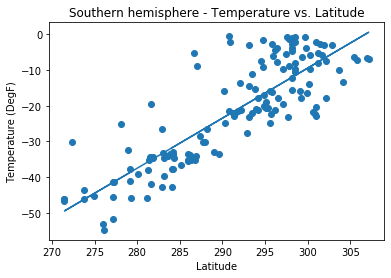

Pearson's correlation0.85


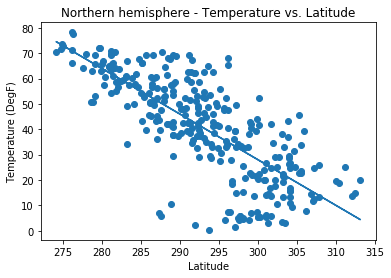

Pearson's correlation-0.76


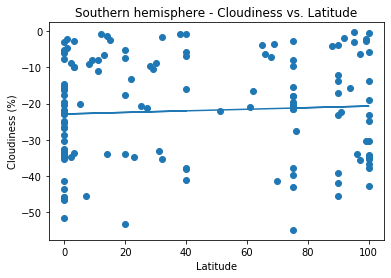

Pearson's correlation0.06


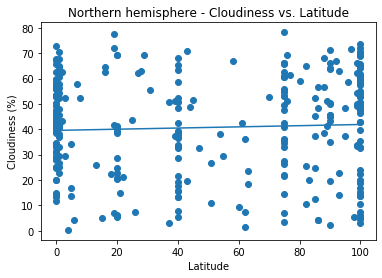

Pearson's correlation0.05


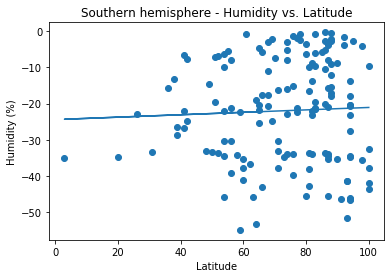

Pearson's correlation0.04


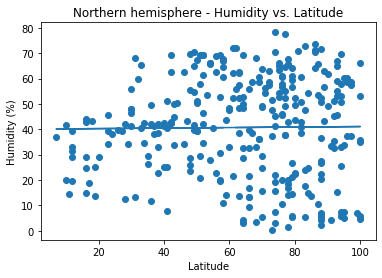

Pearson's correlation0.01


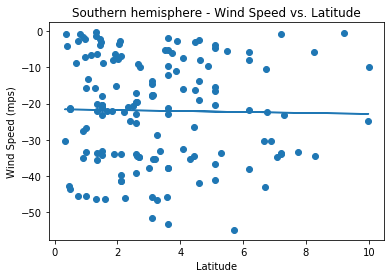

Pearson's correlation-0.02


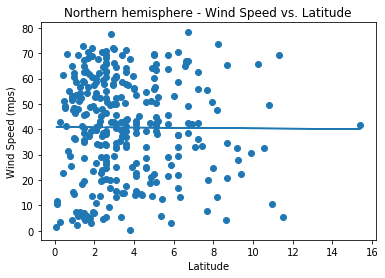

Pearson's correlation-0.01


In [25]:
plot_linear_regression(temp_south, lat_south, "Southern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")
plot_linear_regression(temp_north, lat_north, "Northern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")
plot_linear_regression(cloud_south, lat_south, "Southern hemisphere - Cloudiness vs. Latitude", "Cloudiness (%)", "Latitude")
plot_linear_regression(cloud_north, lat_north, "Northern hemisphere - Cloudiness vs. Latitude", "Cloudiness (%)", "Latitude")
plot_linear_regression(humid_south, lat_south, "Southern hemisphere - Humidity vs. Latitude", "Humidity (%)", "Latitude")
plot_linear_regression(humid_north, lat_north, "Northern hemisphere - Humidity vs. Latitude", "Humidity (%)", "Latitude")
plot_linear_regression(wind_south, lat_south, "Southern hemisphere - Wind Speed vs. Latitude", "Wind Speed (mps)", "Latitude")
plot_linear_regression(wind_north, lat_north, "Northern hemisphere - Wind Speed vs. Latitude", "Wind Speed (mps)", "Latitude")